In [ ]:
import pandas as pd
import regex as re

CORRESPONDANCES = {'W': '-', 'E': '+', 'S': '-', 'N': '+'}

def coord_to_float(coordinate: str) -> float:
    pattern = re.compile(r"([\d]+)°([\d]+)?'?(\d+(?:\.\d+)?)?'' ?([NSEW])")
    match = re.search(pattern, coordinate)
    gra, min, sec = float(match[1]), float(match[2] or 0), float(match[3] or 0)
    min += sec / 60
    gra += min / 60
    dir = match[4]
    gra = float(CORRESPONDANCES[dir] + str(gra))
    return gra




callejero = pd.read_csv('direcciones.csv', encoding='latin1', sep=';')
callejero = callejero[['VIA_CLASE', 'VIA_PAR', 'VIA_NOMBRE', 'NUMERO', 'LATITUD', 'LONGITUD']]

# Coordenadas en float
callejero['FLOAT_LATITUD'] = callejero['LATITUD'].apply(coord_to_float)
callejero['FLOAT_LONGITUD'] = callejero['LONGITUD'].apply(coord_to_float)

def replace_nans(par):
    if str(par).lower() == 'nan':
        return ""
    else:
        return str(par) + " "

callejero['VIA_PAR'] = callejero['VIA_PAR'].apply(replace_nans)
callejero['NOMBRE_COMPLETO'] = callejero['VIA_CLASE'] + " " + callejero['VIA_PAR'] + callejero['VIA_NOMBRE'] + ", " + callejero['NUMERO'].astype(str)
callejero

In [ ]:
direccion = 'PASEO DEL ZURRON, 49'

# direccion.upper() in callejero['NOMBRE_COMPLETO'].unique():
print(callejero[callejero['NOMBRE_COMPLETO'] == 'CALLE DE ALBERTO AGUILERA, 23'][['FLOAT_LATITUD', 'FLOAT_LONGITUD']])

In [ ]:
import callejero as ca
import importlib
importlib.reload(ca)

df = ca.carga_callejero()
df

In [ ]:
importlib.reload(ca)

direccion = 'Calle de Alberto Aguilera, 3'

ca.busca_direccion(direccion, df)



In [ ]:
importlib.reload(ca)
ca.carga_grafo()

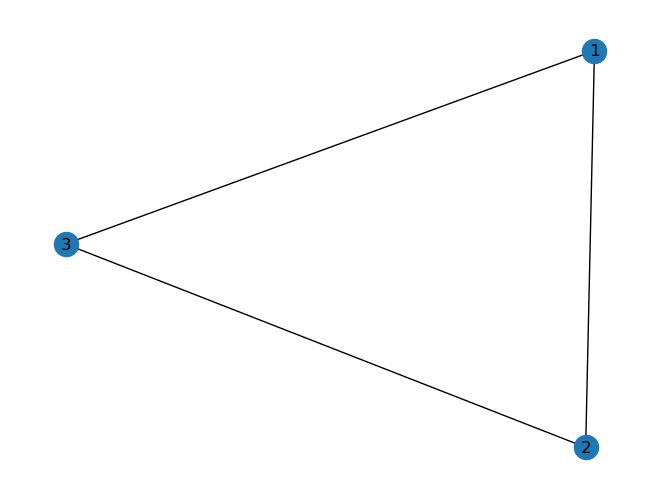

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo simple
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Intentar dibujar el grafo simple
try:
    nx.draw(G, with_labels=True)
    plt.show()
except Exception as e:
    print(f"Error al intentar dibujar el grafo simple: {e}")